# PCA

## Principal components

In [1]:
import numpy as np

m = 60
X = np.zeros((m, 3))  # initialize 3D dataset
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # uneven distribution
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # oval
X += 0.28 * np.random.randn(m, 3)  # add more noise
X += [0.2, 0, 0.2]  # shift a bit

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

In [2]:
X_centered

array([[-8.64181597e-01, -3.07845752e-01, -1.05933398e-01],
       [ 1.57721818e-01,  5.38636990e-01, -4.70605785e-01],
       [ 1.36585411e+00, -3.65356467e-01, -1.66492702e-01],
       [ 4.46201875e-01, -1.43181221e-01,  2.83803892e-01],
       [-7.38888963e-01, -4.27193977e-02,  1.15799219e-01],
       [-2.30755685e-01, -9.03031880e-02, -2.89390552e-02],
       [-8.13965778e-01, -2.79763468e-01,  2.50552689e-01],
       [ 1.46405987e+00,  4.39873812e-01,  3.04034670e-01],
       [ 3.92472299e-01, -6.14267088e-01,  1.24236228e-01],
       [ 1.53938473e+00, -3.49310966e-01,  4.61145682e-01],
       [-1.23772137e+00,  2.85895304e-01,  4.74186374e-02],
       [-4.40287501e-01,  3.42950410e-01, -5.33473838e-01],
       [ 1.31996822e+00,  3.87940018e-01,  4.36855791e-01],
       [-6.47499654e-01, -2.00647438e-01, -1.17446514e-01],
       [-2.47166970e-01,  1.28960090e-01, -1.25287399e-01],
       [-3.59726697e-01,  6.35954046e-02,  2.94266056e-01],
       [-6.85153638e-01, -1.23966971e-01

In [3]:
c1, c2

(array([0.99904597, 0.01845472, 0.03957997]),
 array([-0.02013014,  0.9988997 ,  0.04235772]))

## Projecting down to d dimensions

In [4]:
Vt[:2].T

array([[ 0.99904597, -0.02013014],
       [ 0.01845472,  0.9988997 ],
       [ 0.03957997,  0.04235772]])

$X_{d-proj} = XW_d$, where $W_d$ is the matrix containing the first $d$ columns of $V$.

In [5]:
W2 = Vt[:2].T
X2D = X_centered @ W2
X2D

array([[-8.73231190e-01, -2.94598030e-01],
       [ 1.48885182e-01,  5.14935573e-01],
       [ 1.35121872e+00, -3.99501548e-01],
       [ 4.54366763e-01, -1.39984497e-01],
       [-7.34389086e-01, -2.28934648e-02],
       [-2.33347464e-01, -8.67844755e-02],
       [-8.08435321e-01, -2.52457557e-01],
       [ 1.48281454e+00,  4.22796305e-01],
       [ 3.85679006e-01, -6.16229365e-01],
       [ 1.54972180e+00, -3.60381563e-01],
       [-1.22938760e+00,  3.12504780e-01],
       [-4.54653275e-01,  3.28839370e-01],
       [ 1.34315899e+00,  3.79446240e-01],
       [-6.55233341e-01, -1.92367174e-01],
       [-2.49510114e-01,  1.28486810e-01],
       [-3.46562831e-01,  8.32312189e-02],
       [-6.90221113e-01, -1.13712645e-01],
       [-5.29757591e-01, -2.40403321e-01],
       [-3.96344855e-01, -2.60334107e-01],
       [-6.19519220e-01, -1.13588889e-01],
       [ 3.34910399e-01, -3.09476565e-01],
       [-4.52441114e-01,  1.28501562e-01],
       [-1.02718730e+00, -7.20555799e-03],
       [ 2.

## Same as before, but using scikit-learn

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

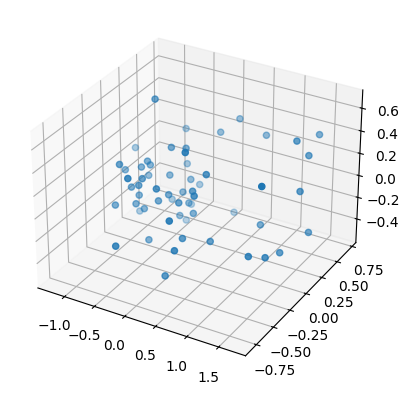

In [7]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_centered[:, 0], X_centered[:, 1], X_centered[:, 2])

plt.show()

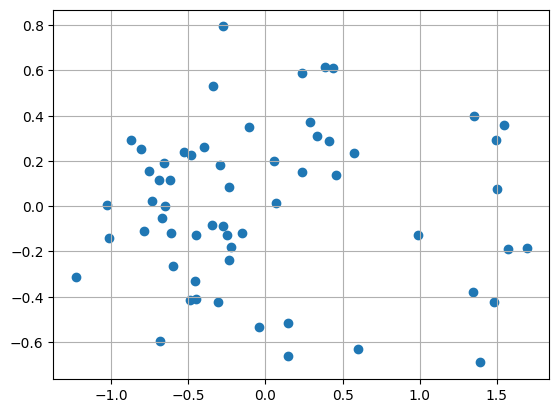

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X2D[:, 0], X2D[:, 1])
plt.grid()

plt.show()

## Explained variance ratio

In [9]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

## Choosing the right number of dimensions

In [10]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [11]:
d

154

In [12]:
X_full = pca.fit_transform(X_train)
X_full.shape

(60000, 784)

In [13]:
pca = PCA(n_components=0.95) # Instead of setting the componentes to d, set the percentage of the variance we want to preserve.
X_reduced = pca.fit_transform(X_train)

In [14]:
X_reduced.shape

(60000, 154)

In [15]:
pca.n_components_

154

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state=42),
    RandomForestClassifier(random_state=42),
)
param_distrib = {
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500),
}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [17]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}

In [18]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(60000, 784)

## Randomized PCA

In [19]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced.shape

(60000, 154)

## Incremental PCA

In [20]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [21]:
X_reduced.shape

(60000, 154)

### mmap

In [22]:
# Simulate the data coming from a file and mmap it

# First create the file
filename = "datasets/my_mnist.mmap"
X_mmap = np.memmap(filename, dtype="float32", mode="write", shape=X_train.shape)
X_mmap[:] = X_train # Could be a loop instead, saving the data chunk by chunk
X_mmap.flush()

In [23]:
# Read the file
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

# Random projection

In [24]:
# Johnson an dLindenstrauss equation for optimal number of dimensions
(4*np.log(5000)) / ((0.1 ** 2)/2 - (0.1 ** 3)/3)

7300.451306928202

In [25]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, eps = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=eps)
d

7300

In [26]:
n = 20_000
np.random.seed(42)
P = np.random.randn(d, n) / np.sqrt(d) # std dev = square root of variance

X = np.random.randn(m, n) # generate a fake dataset
X_reduced = X @ P.T
X_reduced.shape

(5000, 7300)

In [27]:
# Using sklearn
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=eps, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X)
X_reduced.shape

(5000, 7300)

# LLE (Locally Linear Embedding)

In [28]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)
X_unrolled

array([[ 0.0108341 , -0.04071027],
       [-0.05151856,  0.04028552],
       [-0.02361135,  0.01473503],
       ...,
       [ 0.03496748, -0.01792177],
       [-0.05312703,  0.02822251],
       [ 0.00434442, -0.04424475]])

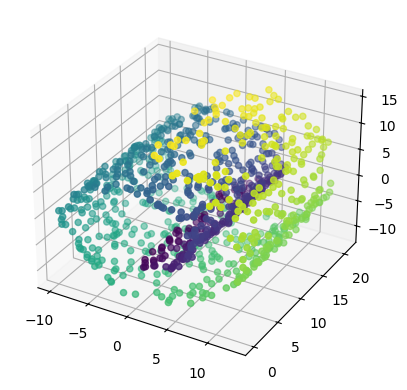

In [29]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t)

plt.show()

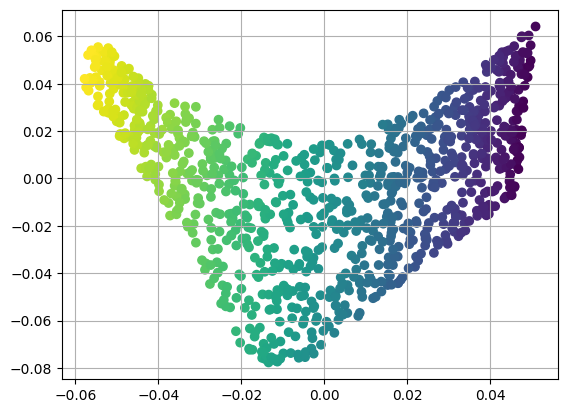

In [30]:
import matplotlib.pyplot as plt

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t)
plt.grid()

plt.show()

In [31]:
X_unrolled

array([[ 0.0108341 , -0.04071027],
       [-0.05151856,  0.04028552],
       [-0.02361135,  0.01473503],
       ...,
       [ 0.03496748, -0.01792177],
       [-0.05312703,  0.02822251],
       [ 0.00434442, -0.04424475]])

# Exercises

## 1-8

1. What are the main motivations for reducing a dataset's dimensionality? What are the main drawbacks?<br>
R. Speed up training, as higher dimensions can make data being far apart, and being able to reduce the data to 2 or 3 dimensions to plot them. The main drawbacks is that the pipelines get more complex and, as precision is lost, also the accuracy.
2. What is the curse of dimensionality?<br>
R. In higher dimensions there are more space, so the data could be more sparse, thus more chance to overfit the data.
3. Once a dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?<br>
R. Yes, but it won't be as the original because some precision is lost while reducing dimensions.
4. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?<br>
R. Yes, but it will not be too convenient because PCA use projection, which squash the data into a a lower dimension, superpositioning data.
5. Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?<br>
R. Depends on the dataset.
6. In what cases would you use regular PCA, incremental PCA, randomized PCA, or random projection?<br>
R. Regular PCA for relatively small datasets; randomized PCA for large datasets; incremental PCA for XL datasets, when it can't fit in memory; random projection when high training speed is priority.
7. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?<br>
R. a
8. Does it make any sense to chain two different dimensionality reduction algorithms?<br>
R. 

## 9

In [32]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

In [33]:
X_train.shape

(60000, 784)

In [34]:
import time

start = time.perf_counter()

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

end = time.perf_counter()

elapsed = end - start
print(f"Execution time: {elapsed:.6f} seconds")

Execution time: 24.616469 seconds


In [35]:
forest_clf.score(X_test, y_test)

0.9705

In [36]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [37]:
X_train_reduced.shape

(60000, 154)

In [38]:
import time

start = time.perf_counter()

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_reduced, y_train)

end = time.perf_counter()

elapsed = end - start
print(f"Execution time: {elapsed:.6f} seconds")

Execution time: 82.159724 seconds


In [39]:
X_test_reduced = pca.transform(X_test)
forest_clf.score(X_test_reduced, y_test)

0.9481

In [40]:
from sklearn.linear_model import SGDClassifier

start = time.perf_counter()

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_reduced, y_train)

end = time.perf_counter()

elapsed = end - start
print(f"Execution time: {elapsed:.6f} seconds")

Execution time: 20.035309 seconds


In [41]:
sgd_clf.score(X_test_reduced, y_test)

0.8959

**Result**: not always you can get a performance boost or better accuracy by applying dimensionality reduction.

## 10

In [63]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_tsne, y_tsne = mnist.data[:5_000], mnist.target[:5_000]

tsne = TSNE(n_components=2)
X_tsne_reduced = tsne.fit_transform(X_tsne)

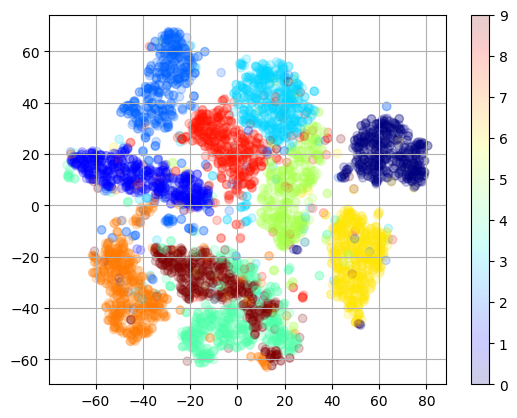

In [67]:
plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1],
           c=y_tsne.astype(np.int8), cmap="jet", alpha=0.2)
plt.grid()
plt.colorbar()

plt.show()